Author: Vaasudevan Srinivasan <br>
Created on: June  26, 2021

In [ ]:
from sklearn.datasets import make_circles
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import plot_model
from tqdm.keras import TqdmCallback
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

tf.__version__

'2.5.0'

# Creating and viewing classification data to model

In [ ]:
n_samples = 1000
x, y = make_circles(n_samples, noise=0.03, random_state=96)

df = pd.DataFrame({'x0': x[:, 0], 'x1': x[:, 1], 'label': y})
df.head()

,x0,x1,label
0,0.149355,-0.945645,0
1,-0.727942,-0.310443,1
2,0.800864,-0.591620,0
3,-0.918959,-0.419239,0
4,-0.070728,0.834098,1


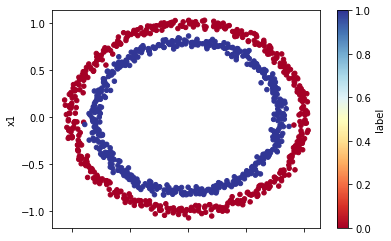

In [ ]:
df.plot.scatter('x0', 'x1', c='label', cmap=plt.cm.RdYlBu);

In [ ]:
tf.random.set_seed(96)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

H = model_1.fit(x, y, epochs=100, callbacks=[TqdmCallback(verbose=0)],
                verbose=0)

In [ ]:
tf.random.set_seed(96)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics='accuracy')

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20))

h = model_2.fit(x, y, epochs=100, verbose=0,
                callbacks=[TqdmCallback(verbose=0), lr_scheduler])

In [ ]:
h_df = pd.DataFrame(h.history)
h_df.head()

,loss,accuracy,lr
0,0.692165,0.497,0.000100
1,0.692068,0.498,0.000112
2,0.691974,0.502,0.000126
3,0.691872,0.500,0.000141
4,0.691778,0.504,0.000158


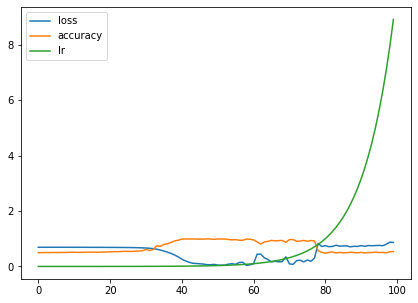

In [ ]:
h_df.plot(figsize=(7, 5));

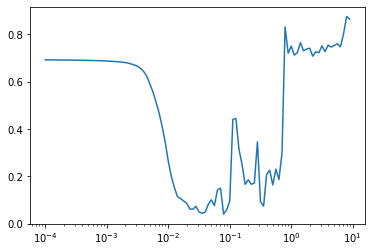

In [ ]:
lrs = 1e-4 * 10 ** (tf.range(100) / 20)
plt.semilogx(lrs, h.history['loss']);

# Multiclass Classification

In [ ]:
%%capture

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

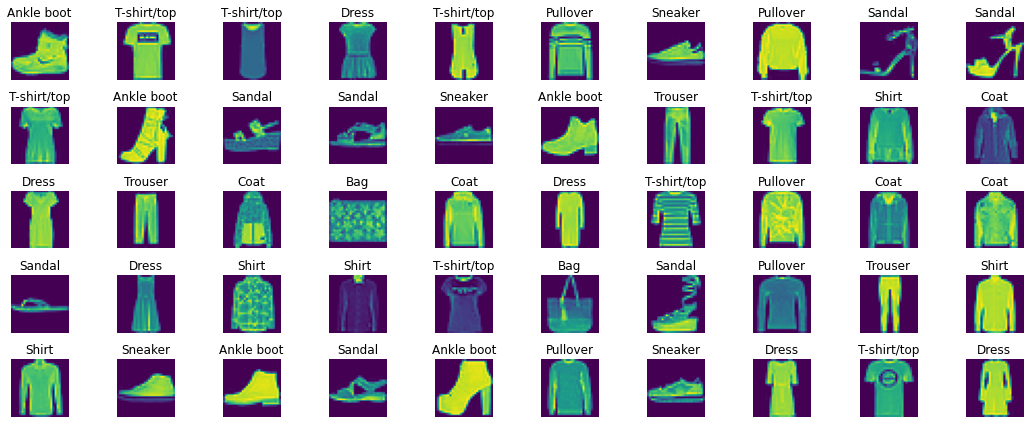

In [ ]:
plt.figure(figsize=(15, 6))
cols, rows = 10, 5
for i in range(cols * rows):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout();

In [ ]:
tf.random.set_seed(96)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

x_train_norm = x_train / 255
x_test_norm = x_test / 255

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics='accuracy')

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20))

h = model.fit(x_train_norm, y_train,
              validation_split=0.2, epochs=40, verbose=0,
              callbacks=[TqdmCallback(verbose=0)])

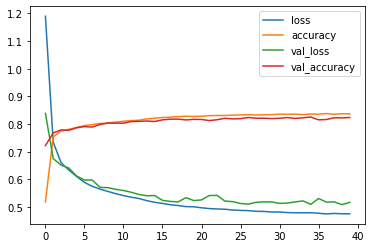

In [ ]:
pd.DataFrame(h.history).plot();

# What patterns is our model learning?

In [ ]:
model.layers

In [ ]:
weights, biases = model.layers[1].get_weights()
weights, weights.shape

(array([[ 1.2976791 , -0.5520836 ,  1.1423731 , -0.9487288 ],
        [ 1.2568301 , -1.2051517 , -1.7526392 ,  0.5270862 ],
        [ 1.3028942 , -1.8028249 , -0.8711526 ,  2.2836652 ],
        ...,
        [ 0.6150791 , -0.12797697, -0.17887093, -0.2734244 ],
        [ 0.73154444, -0.2240249 , -0.40333354, -0.44788492],
        [ 0.5519354 , -0.43225625,  0.13099624,  1.0304439 ]],
       dtype=float32), (784, 4))

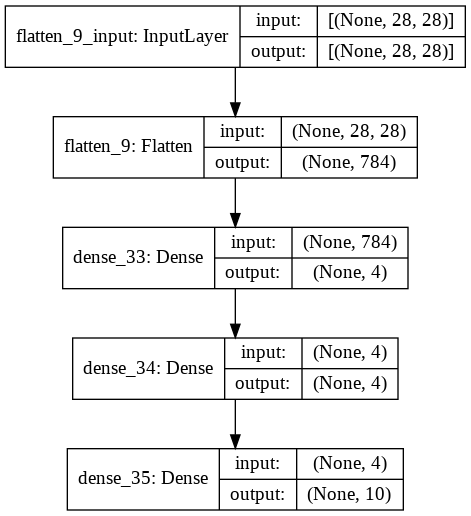

In [ ]:
plot_model(model_2, show_shapes=True)